In [53]:
import joblib
import dill
import pandas as pd
import os
import torchvision
import torch
from sklearn.model_selection import train_test_split
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

Escull entre els models següents el que més t'agradi: 

1. Regressió Logística  
2. Decision Tree
3. Random Forest
4. AdaBoostClassifier
5. XGBoostClassifier
6. MLP (Neuronal Network)
7. SVM Kernel Linear
8. LinearSVC
9. SVM Kernel RBF
10. SVM Kernel Polynomial
11. SVM Kernel Sigmoid


In [55]:
print("1. Regressió Logística\n2. Decision Tree\n3. Random Forest\n4. AdaBoostClassifier\n5. XGBoostClassifier\n6. MLP (Neuronal Network)\n7. SVM Kernel Linear\n8. LinearSVC\n9. SVM Kernel RBF\n10. SVM Kernel Polynomial\n11. SVM Kernel Sigmoid ")
model_escollit = int(input("Tria el teu model: "))

1. Regressió Logística
2. Decision Tree
3. Random Forest
4. AdaBoostClassifier
5. XGBoostClassifier
6. MLP (Neuronal Network)
7. SVM Kernel Linear
8. LinearSVC
9. SVM Kernel RBF
10. SVM Kernel Polynomial
11. SVM Kernel Sigmoid 
Tria el teu model: 2


In [56]:
if model_escollit ==1 : 
    model_escollit="Regressió Logística"
    model = joblib.load('lr.pkl') # Guardo el modelo.
elif model_escollit ==2:
    model_escollit="Decision Tree"
    model = joblib.load('dt.pkl') # Guardo el modelo.
elif model_escollit ==3: 
    model_escollit="Random Forest"
    model = joblib.load('rf.pkl')
elif model_escollit ==4: 
    model_escollit="Ada Boost Classifier"
    model = joblib.load('ada.pkl') # Guardo el modelo.
elif model_escollit ==5: 
    model_escollit="XGBoost Classifier"
    model = joblib.load('xb.pkl') # Guardo el modelo.
elif model_escollit ==6:
    model_escollit="MLP(Neuronal Network)"
    model = joblib.load('mlp.pkl') # Guardo el modelo.
elif model_escollit ==7:
    model_escollit="SVM Kernel Linear"
    model = joblib.load('sl.pkl') # Guardo el modelo.
elif model_escollit ==8:
    model_escollit="LinearSVC"
    model = joblib.load('svcl.pkl') # Guardo el modelo.
elif model_escollit ==9:
    model_escollit="SVM Kernel RBF"
    mnodel = joblib.load('rbf.pkl') # Guardo el modelo.
elif model_escollit ==10:
    model_escollit="SVM Kernel Polynomial"
    model = joblib.load('polynomical.pkl') # Guardo el modelo.
elif model_escollit ==11:
    model_escollit="SVM Kernel Sigmoid"
    model = joblib.load('sigmoid.pkl') # Guardo el modelo.

squeezenet = joblib.load('squeezenet.pkl') # Guardo el modelo.


In [57]:
normalize = dill.load(open('normalize.pkl','rb'))
load_dataset = dill.load(open('load_data.pkl','rb'))
transform = joblib.load('image_transform.pkl')
atributs = joblib.load('atributes.pkl')

In [67]:
# Carreguem dataset d'exemple
nom_dataset = input("Introdueix el nom del dataset: ")

dataset = load_dataset(nom_dataset)

Introdueix el nom del dataset: Brain Tumor.csv


In [68]:
dataset2 = joblib.load('dataset.pkl')
dataset = dataset[atributs]
dataset['Class']=dataset2['Class'].head(len(dataset))

dataset = normalize(dataset)
y = dataset.iloc[:,-1]
X = dataset.loc[:,atributs]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

model.score(X_test,y_test)


0.9827357237715804

In [69]:
mostra = int(input(f"Escull un valor fins a {len(X_test)}: "))

Escull un valor fins a 753: 34


In [70]:
if model.predict(X_test)[mostra-1] == 1:
    prediccio = "el pacient té un tumor"
else: 
    prediccio = "el pacient no té un tumor"
    
if y_test[y_test.index[mostra-1]] == 1:
    realitat = "el pacient té un tumor"
else:
    realitat =  "el pacient no té un tumor"
    

In [71]:
print(f"Utilitzant el dataset {nom_dataset}: ")
print(f"El model escollit ha estat {model_escollit} i ha obtingut una precisió del {round(model.score(X_test,y_test),3)*100}%")
print(f"Un exemple de classificació seria la mostra {mostra} que hem predit que {prediccio} i en realitat  {realitat}")




Utilitzant el dataset Brain Tumor.csv
El model escollit ha estat Decision Tree i ha obtingut una precisió del 98.3%
Un exemple de classificació seria la mostra 34 que hem predit que el pacient té un tumor i en realitat  el pacient té un tumor


Un cop hem vist com funcionen les classificacions per dades a partir d'un dataset en concret, anem a provar que passa si utilitzem imatges.

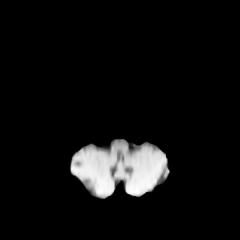

In [45]:
actual_dir = os.getcwd() 
folder_name="Brain Tumor"
data_dir = os.path.join(actual_dir, folder_name)
image_dir = os.path.join(data_dir, folder_name)
image = os.path.join(image_dir, "Image1.jpg")
img = Image.open(image)
img

In [77]:
model = squeezenet.eval()
img_t =  transform(img)
batch_t = torch.unsqueeze(img_t,0)
out = model(batch_t)
labels = ["No tumor", "Tumor"]
_, index = torch.max(out, 1)
 
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100

if (labels[index[0]] == "Tumor"):
    pacient = "tenir un tumor cerebral"
else: 
    pacient = "no tenir un tumor cerebral"
print(f"El pacient de la imatge 1 té {round(percentage[index[0]].item(),2)}% de possiblitats de {pacient}")


El pacient de la imatge 1 té 99.07% de possiblitats de tenir un tumor cerebral


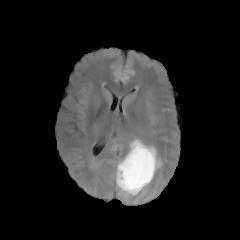

In [78]:
actual_dir = os.getcwd() 
folder_name="Brain Tumor"
data_dir = os.path.join(actual_dir, folder_name)
image_dir = os.path.join(data_dir, folder_name)
image = os.path.join(image_dir, "Image151.jpg")
img = Image.open(image)
img

In [79]:
img_t =  transform(img)
batch_t = torch.unsqueeze(img_t,0)
out = model(batch_t)
labels = ["No tumor", "Tumor"]
_, index = torch.max(out, 1)
 
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100

if (labels[index[0]] == "Tumor"):
    pacient = "tenir un tumor cerebral"
else: 
    pacient = "no tenir un tumor cerebral"
print(f"El pacient de la imatge 151 té {round(percentage[index[0]].item(),2)}% de possiblitats de {pacient}")

El pacient de la imatge 151 té 99.07% de possiblitats de tenir un tumor cerebral
